# Анализ убытков приложения ProcrastinatePRO+

Ход исследования: 
- Обзор данных.
- Предобработка данных.
- Составить профили пользователей (определить откуда приходят пользователи и какими устройствами они пользуются).
- Маркетинг (сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент)
- Оценка окупаемости рекламы (проверить конверсию пользователей и динамику её изменения, проанализируйте окупаемость рекламы)
- Написание общего вывода.

## 1. Откроем файлы с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

try:
    visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # лог сервера с информацией о посещениях сайта
    pd.read_csv('orders_info_short.csv'),  # информация о заказах
    pd.read_csv('costs_info_short.csv'),  # информацию о расходах на рекламу
    )
except:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # лог сервера с информацией о посещениях сайта
    pd.read_csv('/datasets/orders_info_short.csv'),  # информация о заказах
    pd.read_csv('/datasets/costs_info_short.csv'),  # информацию о расходах на рекламу
    )

### 1.1 Таблица visits  (лог сервера с данными об их посещениях)

In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
# приведем столбцы к змеиному регистру
visits.columns = map(str.lower, visits.columns)
visits.columns = visits.columns.str.replace(" ", "_")

# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [4]:
#Выведем количество пропущенных значений для каждого столбца
print(visits.isna().sum())
#Выведем количество дубликатов
print(visits.duplicated().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
0


In [5]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

**Описание данных таблицы visits:**   
*user_id* — уникальный идентификатор пользователя,  
*region* — страна пользователя,  
*device* — тип устройства пользователя,  
*channel* — идентификатор источника перехода,  
*session_start* — дата и время начала сессии,  
*session_end* — дата и время окончания сессии.

**Вывод:**  
- исправили несоответствующий тип данных;  
- исправили нарушения в стиле заголовков;  
- явные дубликаты и пропуски в данных отсутствуют.


### 1.2 Таблица orders  (информация о заказах)

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
# приведем столбцы к змеиному регистру
orders.columns = map(str.lower, orders.columns)
orders.columns = orders.columns.str.replace(" ", "_")

# преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
#Выведем количество пропущенных значений для каждого столбца
print(orders.isna().sum())
#Выведем количество дубликатов
print(orders.duplicated().sum())

user_id     0
event_dt    0
revenue     0
dtype: int64
0


In [9]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

**Описание данных таблицы orders:**    
*user_id*  — уникальный идентификатор пользователя,  
*event_dt* — дата и время покупки,  
*revenue* — сумма заказа.

**Вывод:**  
- исправили несоответствующий тип данных;  
- исправили нарушения в стиле заголовков;  
- явные дубликаты и пропуски в данных отсутствуют.

### 1.3 Таблица costs  (информацию о расходах на рекламу)

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
# приведем столбцы к змеиному регистру
costs.columns = map(str.lower, costs.columns)

# преобразуем данные о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
#Выведем количество пропущенных значений для каждого столбца
print(costs.isna().sum())
#Выведем количество дубликатов
print(costs.duplicated().sum())

dt         0
channel    0
costs      0
dtype: int64
0


In [13]:
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

**Описание данных таблицы costs:**   
*dt* — дата проведения рекламной кампании,  
*channel* — идентификатор рекламного источника,  
*costs* — расходы на эту кампанию.

**Вывод:**  
- исправили несоответствующий тип данных;  
- исправили нарушения в стиле заголовков;  
- явные дубликаты и пропуски в данных отсутствуют.

## 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

get_profiles() — для создания профилей пользователей,  
get_retention() — для подсчёта Retention Rate,  
get_conversion() — для подсчёта конверсии,  
get_ltv() — для подсчёта LTV и ROI.

функции для построения графиков:

filter_data() — для сглаживания данных,  
plot_retention() — для построения графика Retention Rate,  
plot_conversion() — для построения графика конверсии,  
plot_ltv_roi — для визуализации LTV и ROI.

In [14]:
#функция для создания профилей пользователей
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [15]:
# функция для расчёта удержания (Retention Rate)
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



In [17]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации удержания (Retention Rate)

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных

### 3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [22]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  week  payer  acquisition_cost  
0       2019-05-07 2019-05-01    19   True          1.088172  
1       2019-07-09 2019-07-01    28  False          1.107237  
2       2019-10-01 2019-10-01    40  False          0.000000  
3       2019-08-22 2019-08-01    34  False          0.988235  
4       2019-10-02 2019-10-01    40  False          0.230769  
...            ...        ...   ...    ...               ...  
150003  2019-09-28 2019-09-01    39  False          3.500000  
150004  2019-10-21 2019-10-01    43  False          0.000000  
150005  2019-07-23 2019-07-01    30  False          2.600000  
150006  2019-09-28 2019-09-01    39  False          0.205714  
150007  2019-10-18 2019-10-01    42  False          0.000000  

[150008 rows x 10 columns]

Результат-150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить сайт.

In [23]:
# находим минимальную дату привлечения пользователей
min_date = profiles['dt'].min()
# находим максимальную дату привлечения пользователей
max_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей: {} '.format(min_date))
print('Максимальная дата привлечения пользователей: {} '.format(max_date))

Минимальная дата привлечения пользователей: 2019-05-01 
Максимальная дата привлечения пользователей: 2019-10-27 


По условию в нашем распоряжении данные приложения Procrastinate Pro+ о пользователях, привлечённых с 1 мая по 27 октября 2019 года, мы убедились, что данные корректны.

### 3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [24]:
#напишем функцию для распределения пользователей
def profiles_source(source):
    #определим количество пользователей и долю платящих пользователей
    data = (
        profiles.groupby(source)
        .agg(
            {'user_id': 'nunique', 'payer':'mean'}
        )
        .sort_values(by='user_id', ascending=False)
        .reset_index()
    )
    #переведем в % долю платящих пользователей
    data['payer']=round(data['payer']*100, 2)
    #общая доля платящих пользователей в %
    data['general_payer'] = round((data['payer']/data['payer'].sum()*100), 2)
    display(data)
    
    #построим динамику привлечения новых пользователей
    profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns=source,  # источник
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
    ).plot(figsize=(15, 5), grid=True)
    plt.show()

In [25]:
#напишем функцию для распределения пользователей
def profiles_source(source):
    #определим количество пользователей и долю платящих пользователей
    data = (
        profiles.groupby(source)
        .agg(
            {'user_id': 'nunique', 'payer':'mean'}
        )
        .sort_values(by='user_id', ascending=False)
        .reset_index()
    )
    #переведем в % долю платящих пользователей
    data['payer']=round(data['payer']*100, 2)
    #общая доля платящих пользователей в %
    data['general_payer'] = round((data['payer']/data['payer'].sum()*100), 2)
    display(data)
    
    #построим динамику привлечения новых пользователей
    profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns=source,  # источник
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
    ).plot(figsize=(15, 5), grid=True)
    plt.xlabel('Дата привлечения пользователей')
    plt.ylabel('Привлеченных пользователей')
    plt.title(f'Распределение пользователей по {source}');
    plt.show()

region  user_id  payer  general_payer
0  United States   100002   6.90          36.72
1             UK    17575   3.98          21.18
2         France    17450   3.80          20.22
3        Germany    14981   4.11          21.87

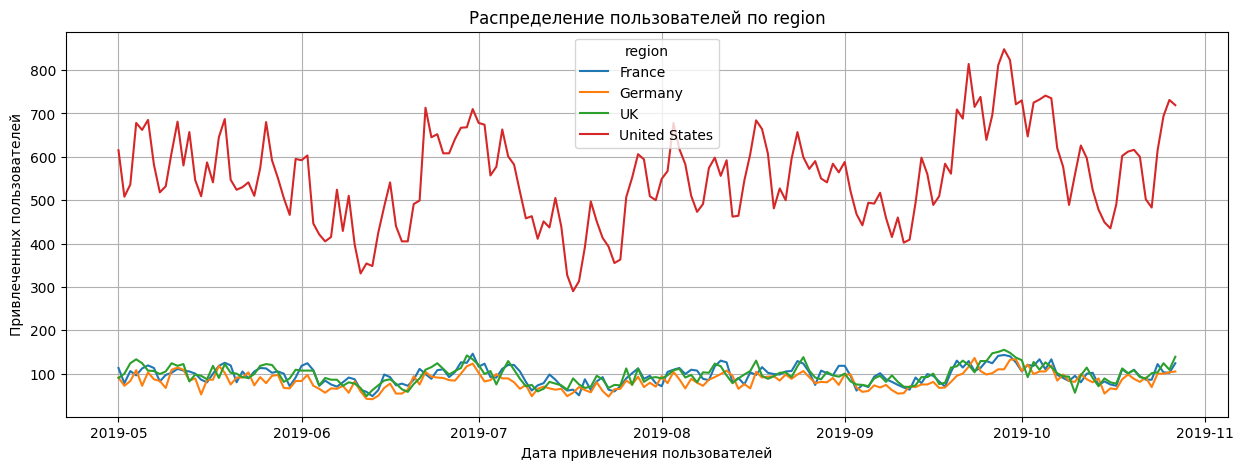

In [26]:
# распределение пользователей по странам
profiles_source('region')

**Вывод:**
- Наибольшее привлечение пользователей из United States, что практически в 6 раз превышает показатели других регионов, в платящих пользователей переходит 6,9%;
- По остальным регионам привлечение пользователей практически одинаковое, так же как и процент пользователей, переходящий в платящих и составляет около 4%

### 3.3 Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

device  user_id  payer  general_payer
0   iPhone    54479   6.21          26.46
1  Android    35032   5.85          24.93
2       PC    30455   5.05          21.52
3      Mac    30042   6.36          27.10

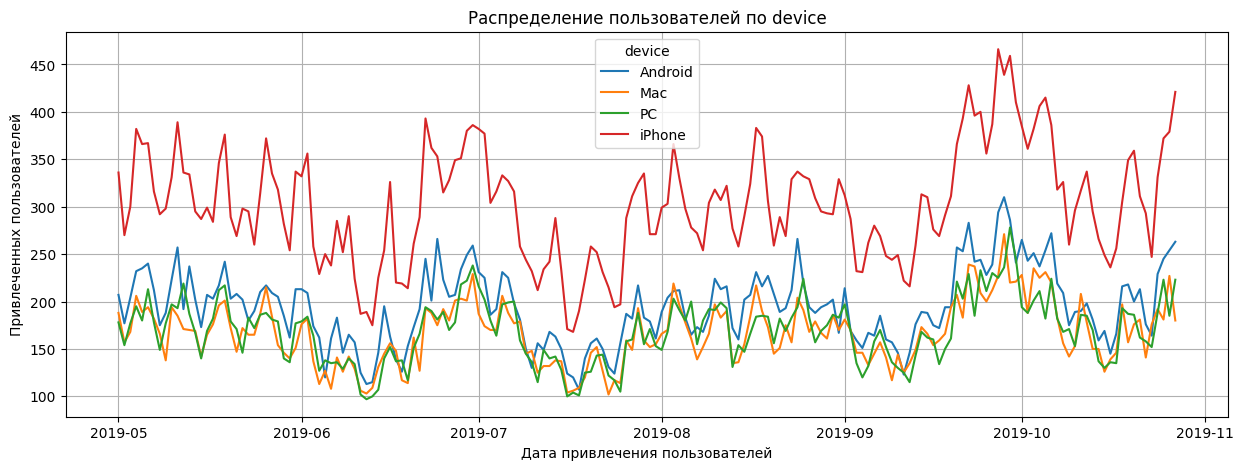

In [27]:
# распределение пользователей по устройствам
profiles_source('device')

**Вывод:**
- набольшее число пользователей являются владельцами iPhone	
- наибольший процент платящих пользователей приходят с Mac

### 3.4 Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

channel  user_id  payer  general_payer
0              organic    56439   2.06           2.86
1             FaceBoom    29144  12.20          16.93
2               TipTop    19561   9.60          13.32
3   OppleCreativeMedia     8605   2.71           3.76
4              LeapBob     8553   3.06           4.25
5       WahooNetBanner     8553   5.30           7.36
6       RocketSuperAds     4448   7.91          10.98
7         MediaTornado     4364   3.57           4.95
8              YRabbit     4312   3.83           5.32
9           AdNonSense     3880  11.34          15.74
10      lambdaMediaAds     2149  10.47          14.53

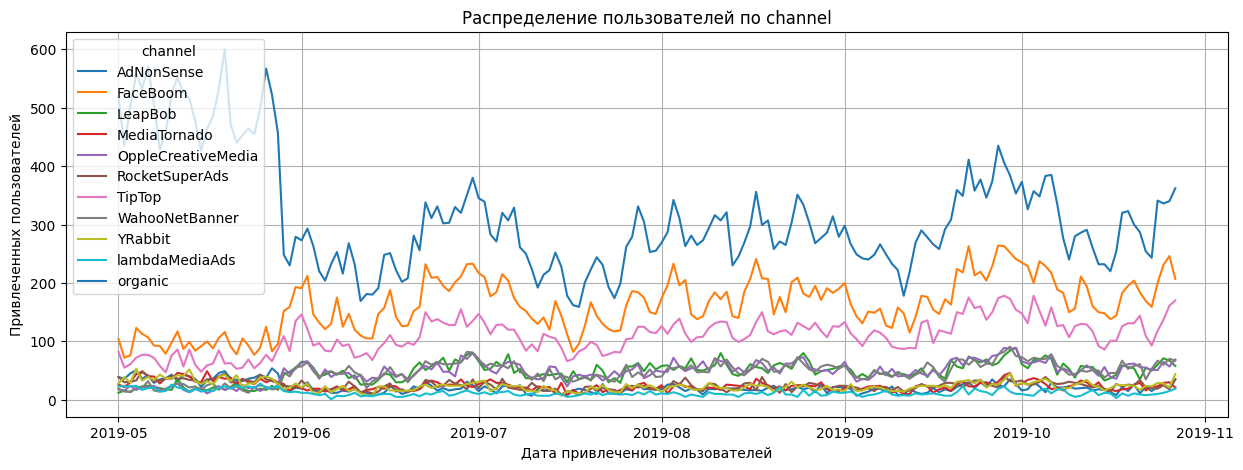

In [28]:
# распределение пользователей по рекламным источникам
profiles_source('channel')

**Вывод:**
- Наибольшее количество пользователей приходят из organic (т.е. приходят самостоятельно), однако имеет самый маленький процент перехода в платящих пользователей;
- Лидерами по привлечению пользователей и переходу их в платящих является: FaceBoom и TipTop;
- Хорошо себя проявили AdNonSense, lambdaMediaAds. Хоть количество пользователей небольшое, зато хорошие показатели перехода пользователей в платящие.
- Наихудшим образом себя проявили каналы привлечения: OppleCreativeMedia, LeapBob, MediaTornado и YRabbit

## 4. Маркетинг

Посчитайем общую сумму расходов на маркетинг

In [29]:
#Посчитайем общую сумму расходов на маркетинг
print('Общая сумма расходов на маркетинг: {} '.format(round(profiles['acquisition_cost'].sum(), 2)))

Общая сумма расходов на маркетинг: 105497.3 


In [30]:
#определим распределение трат по рекламным компаниям
acquisition_channel = (
    profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
    ).sort_values(by='acquisition_cost', ascending=False)
acquisition_channel

acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00

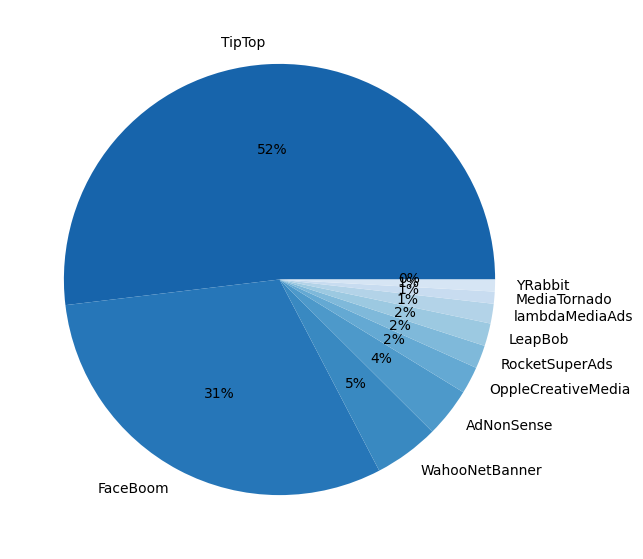

In [31]:
#построим распределение трат по рекламным компаниям
colors = plt.get_cmap('Blues')(np.linspace(0.8, 0.1, len(acquisition_channel['acquisition_cost'])))
acquisition_channel.plot.pie(subplots=True, colors=colors, figsize=(11, 7), legend=False, autopct='%.0f%%')
plt.ylabel('')
plt.show()

Рассмотрим динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику

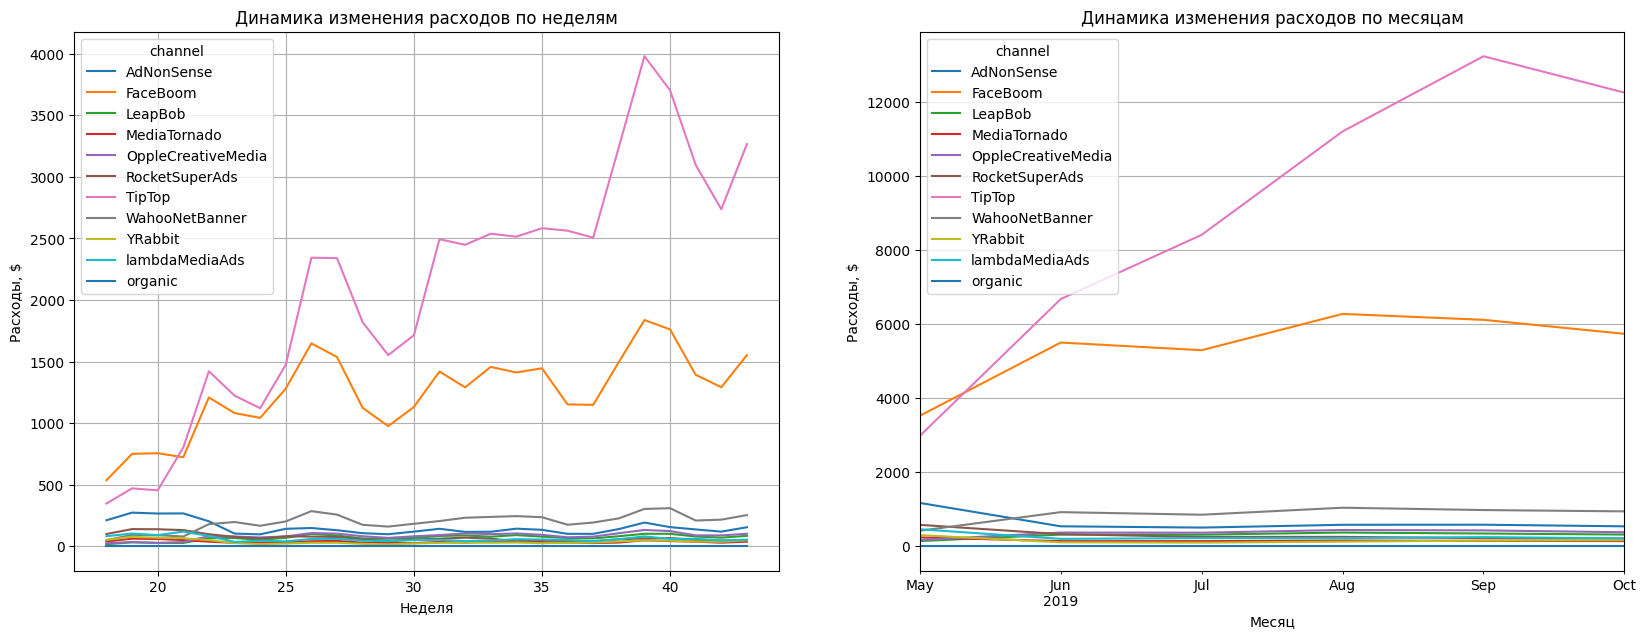

In [32]:
plt.figure(figsize = (20, 7))  # размер сетки для графиков
#построим динамику изменения расходов во времени по неделям
profiles.pivot_table(
    index='week',  # даты проведения рекламных компаний
    columns='channel',  # каналы привлечения
    values='acquisition_cost',  
    aggfunc='sum'  
    ).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям')
plt.ylabel('Расходы, $')
plt.xlabel('Неделя')

#построим динамику изменения расходов во времени по месяцам
profiles.pivot_table(
    index='month',  # даты проведения рекламных компаний
    columns='channel',  # каналы привлечения
    values='acquisition_cost',  
    aggfunc='sum'  
    ).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам')
plt.ylabel('Расходы, $')
plt.xlabel('Месяц')
plt.show()

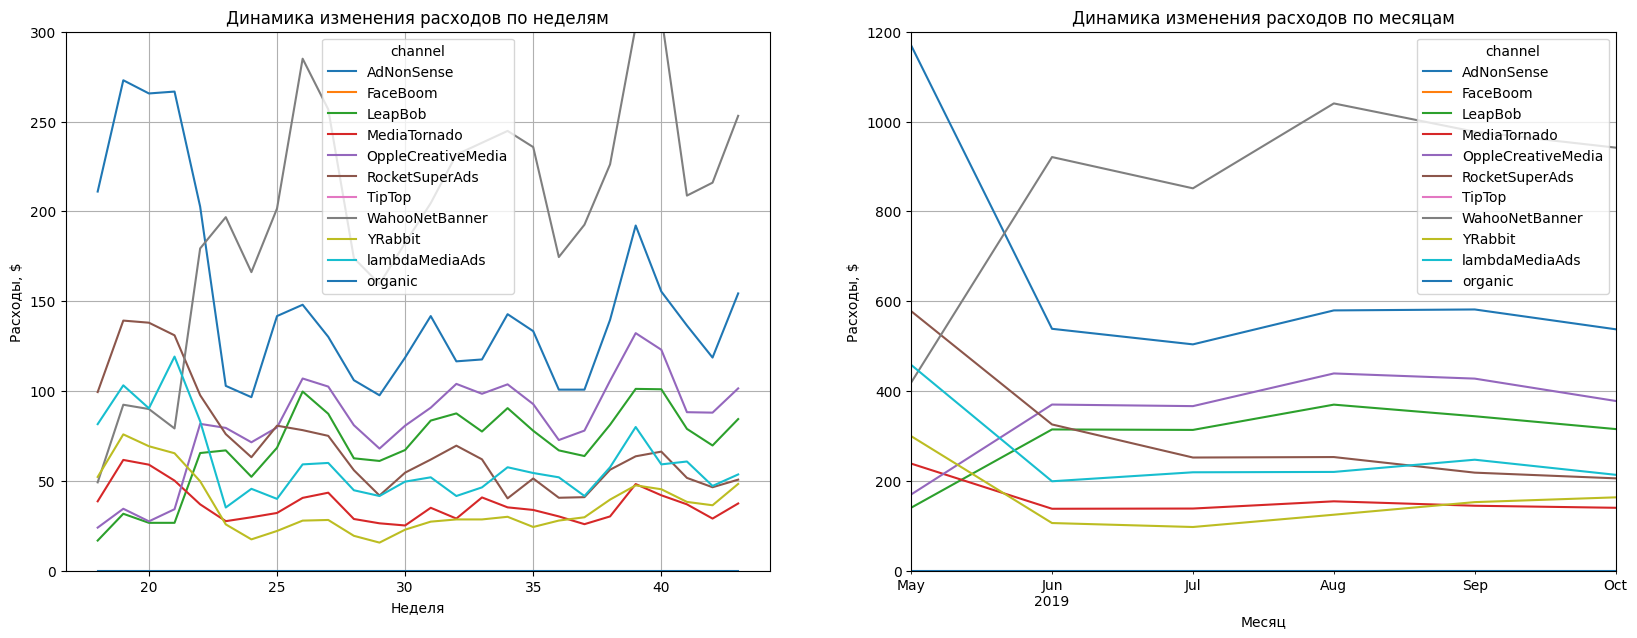

In [33]:
#изменим масштаб
plt.figure(figsize = (20, 7))  # размер сетки для графиков
#построим динамику изменения расходов во времени по неделям
profiles.pivot_table(
    index='week',  # даты проведения рекламных компаний
    columns='channel',  # каналы привлечения
    values='acquisition_cost',  
    aggfunc='sum'  
    ).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям')
plt.ylabel('Расходы, $')
plt.xlabel('Неделя')
plt.ylim(0, 300)

#построим динамику изменения расходов во времени по месяцам
profiles.pivot_table(
    index='month',  # даты проведения рекламных компаний
    columns='channel',  # каналы привлечения
    values='acquisition_cost',  
    aggfunc='sum'  
    ).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам')
plt.ylabel('Расходы, $')
plt.xlabel('Месяц')
plt.ylim(0, 1200)
plt.show()

За весь период больше всего выросли затраты на канал TipTop и поддерживаюся высокие затраты на канал FaceBoom. По остальным каналам практически одинаковые и стабильные затраты. В начале периода наблюдается рост расходов на канал WahooNetBanner и снижение расходов на каналы AdNonSense иlambdaMediaAds (возможно это было ошибочное решение, ведь AdNonSense, lambdaMediaAds хорошо себя проявили в привлечении платящих пользователей).

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

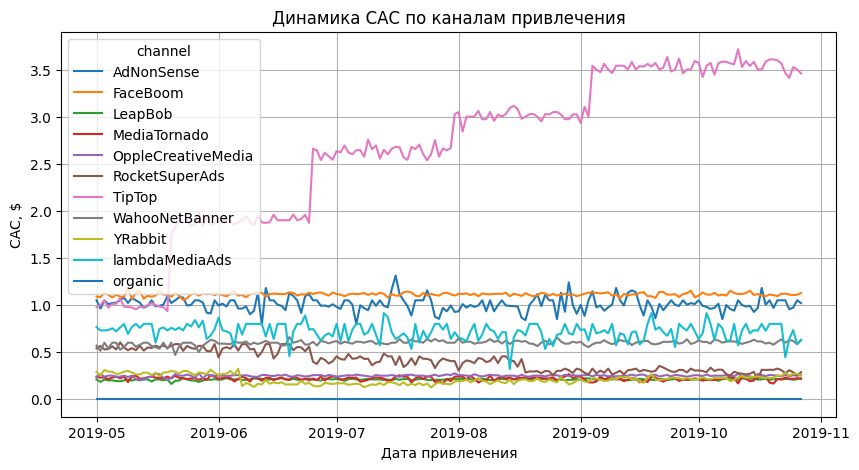

In [34]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


In [35]:
#выведем сас по каналам
cac = (profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean')
      ).sort_values(by='acquisition_cost', ascending=False)
cac


acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) по проекту.

In [36]:
#выведем сас по проекту
profiles['acquisition_cost'].describe()

count    150008.000000
mean          0.703278
std           0.954097
min           0.000000
25%           0.000000
50%           0.247500
75%           1.108943
max           3.715385
Name: acquisition_cost, dtype: float64

Средняя стоимость привлечения одного пользователя составляет 0.7, данные сильно отличаются от медианы 0.24 за счет бесплатного привлечения в organic.  
Исключим 'organic' и узнаем, сколько в среднем стоило привлечение одного пользователя (CAC).

In [37]:
#выведем сас по проекту
profiles.query('channel != "organic"')['acquisition_cost'].describe()

count    93569.000000
mean         1.127481
std          0.990503
min          0.124615
25%          0.257143
50%          1.080531
75%          1.128571
max          3.715385
Name: acquisition_cost, dtype: float64

Средняя стоимость привлечения одного пользователя составляет 1.1, что близко к медианному значению (мало выбросов).  
Стоимость привлечения пользователей по каналу TipTop ежемесячно растет и на конец периода составляет 3.5, а средняя стоимость составляет 2.8, что значительно привышает САС других каналов.
Минимальная стоимость привлечения клиента составила 0.2 у каналов YRabbit, LeapBob и LeapBob.

**Вывод:**  
- Общая сумма расходов на маркетинг составила: 105497.3
- Средняя стоимость привлечения одного пользователя составляет 1.1
- Наибольшие вложения приходятся на рекламные источники TipTop и FaceBoom и составляют 83% от общих затрат.
- За весь период больше всего выросли затраты на канал TipTop и поддерживаюся высокие затраты на канал FaceBoom. По остальным каналам практически одинаковые и стабильные затраты.   
- Стоимость привлечения пользователей по каналу TipTop ежемесячно растет и на конец периода составляет 3.5, а средняя стоимость составляет 2.8, что значительно привышает САС других каналов.
- Минимальная стоимость привлечения клиента составила 0.2 у каналов YRabbit, LeapBob и LeapBob.
- Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

## 5. Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Органических пользователей исключим из анализа, т.к. необходимо рассчитать окупаемость рекламы.

Установим момент анализа данных: 27.11.2019  
Горизонт анализа данных: 14

In [38]:
#установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### 5.1 Анализ окупаемости рекламы  
Проведем анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.  
Целью исследования является изучение окупаемости рекламы, поэтому исключим пользователей пришедших из органического канала.

In [39]:
#исключим органический трафик
profiles = profiles.query('channel != "organic"')

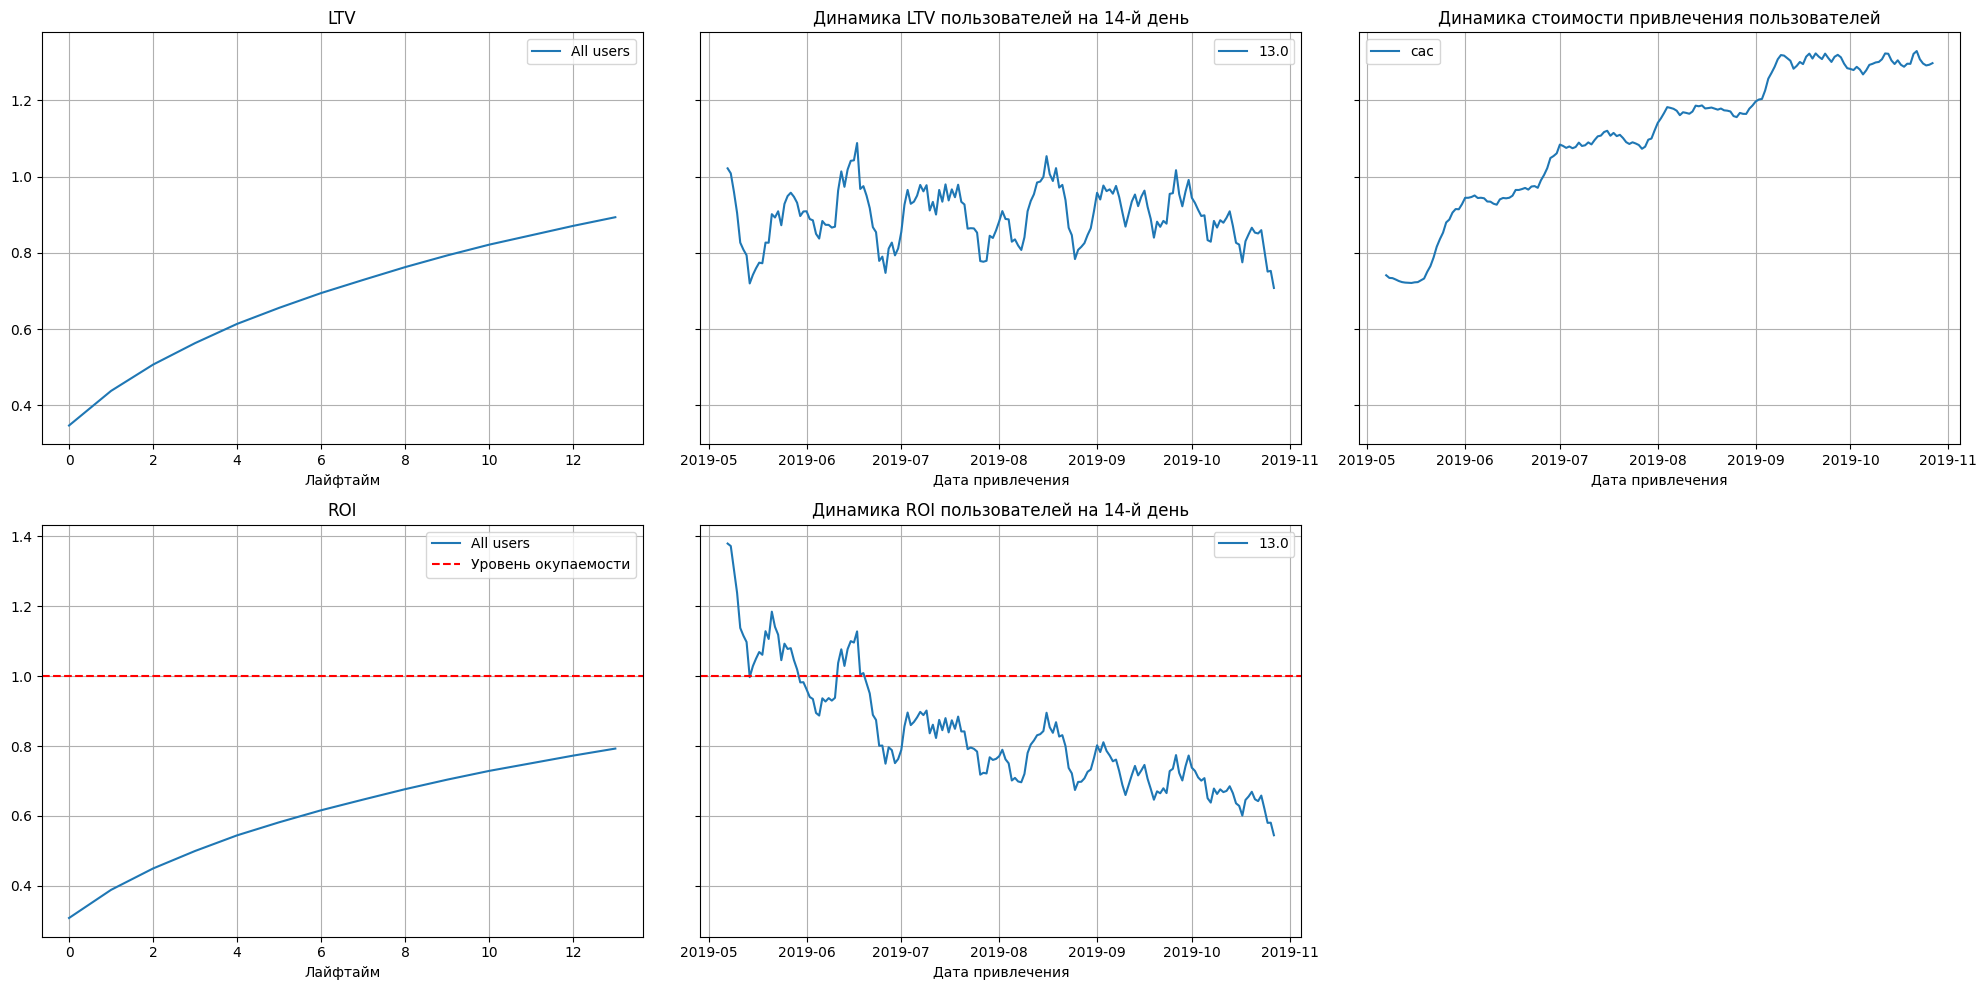

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- реклама не окупается. ROI в конце лайфтайма достигает только 80%;  
- САС растет. Увеличивается расход рекламного бюджета;  
- На LTV влияет сезонный фактор, но показатель достаточно стабилен;  
- ROI пользователей стремительно падает.

### 5.2 Конверсия и удержание пользователей

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

#### 5.2.1 Разбивка по устройствам

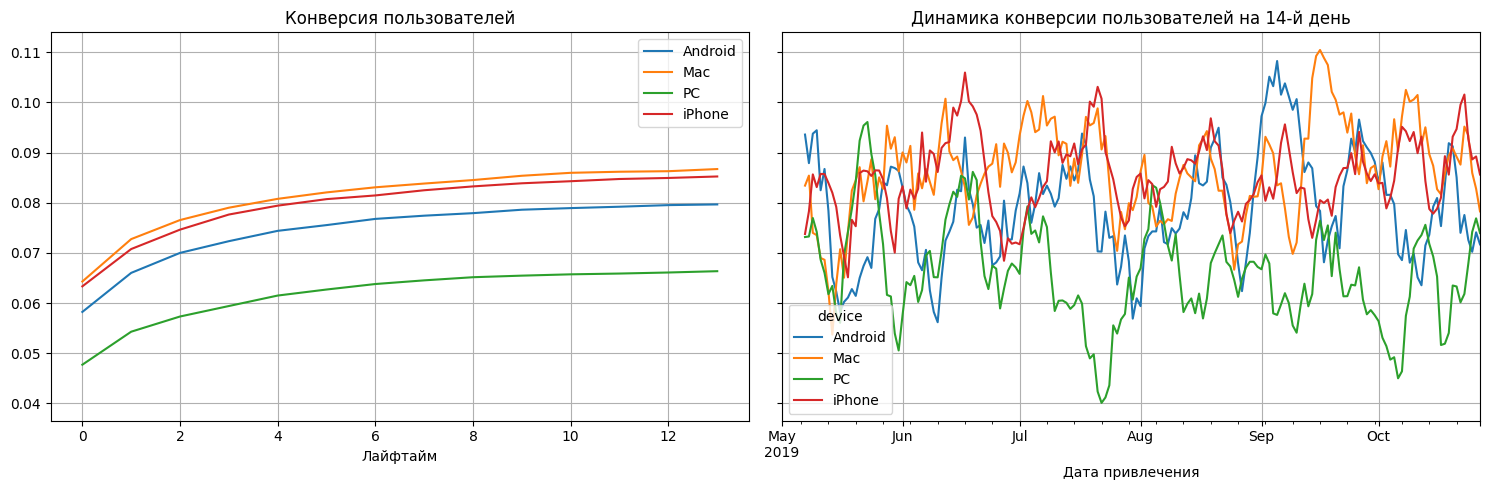

In [41]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Пользователи iPhone и Mac хорошо конвертируются, что нельзя сказать про PC.

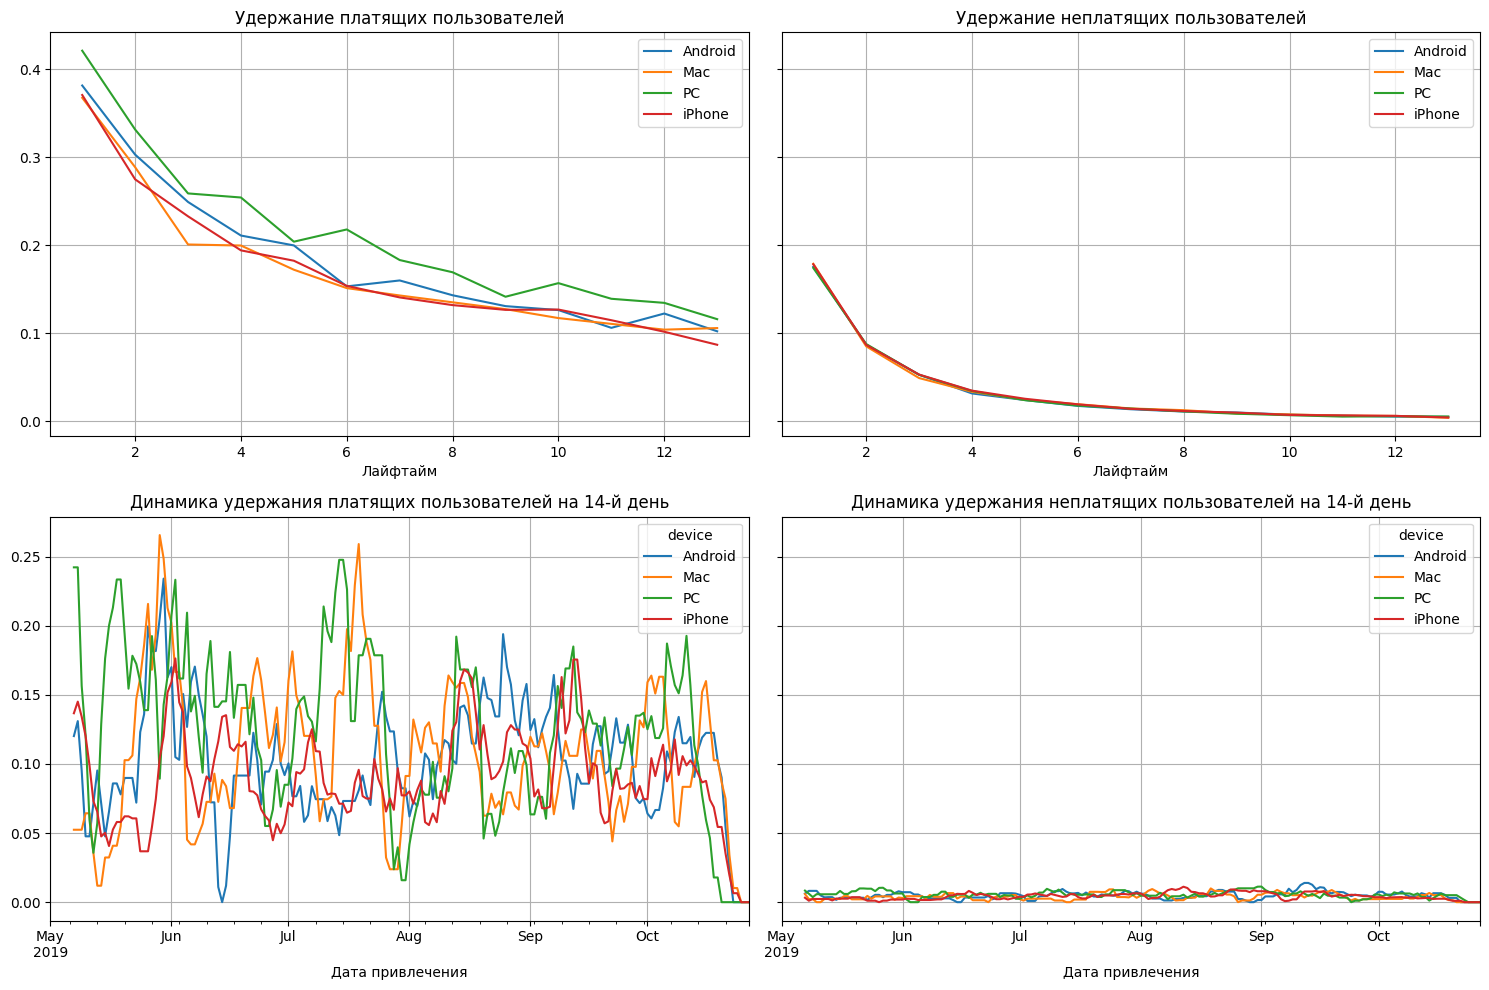

In [42]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для всех устройств картина выглядит примерно одинаково: стабильно плохое удержание к 14 дню и резкий спад к концу периода.

#### 5.2.2 Разбивка по регионам

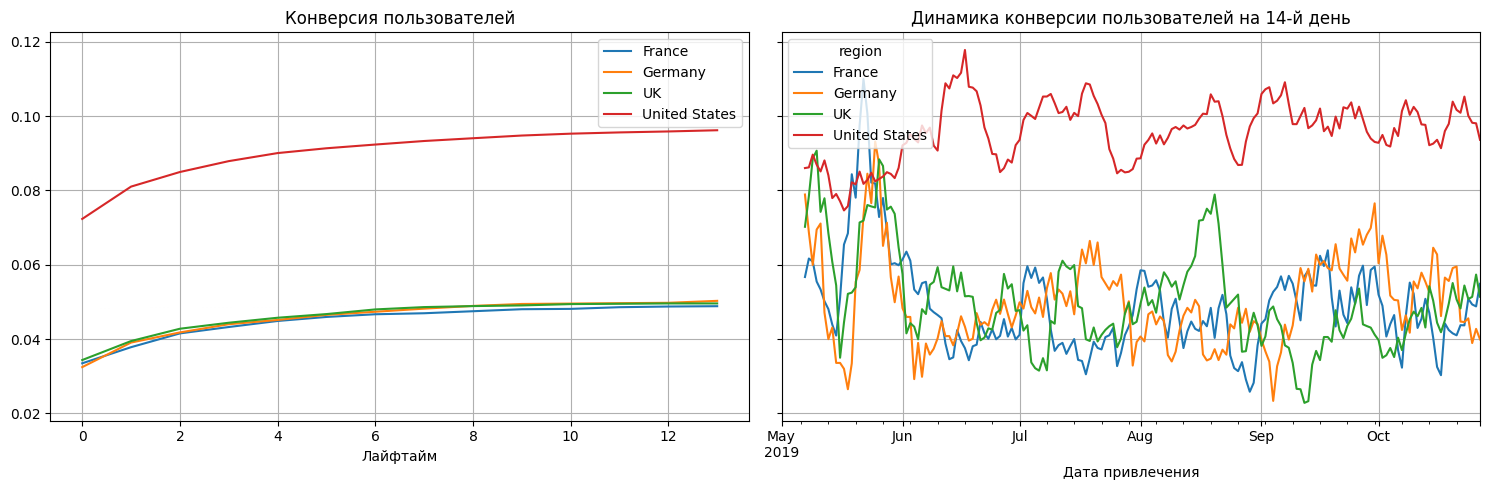

In [43]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Конверсия пользователей США значительно выше, чем в других регионах.

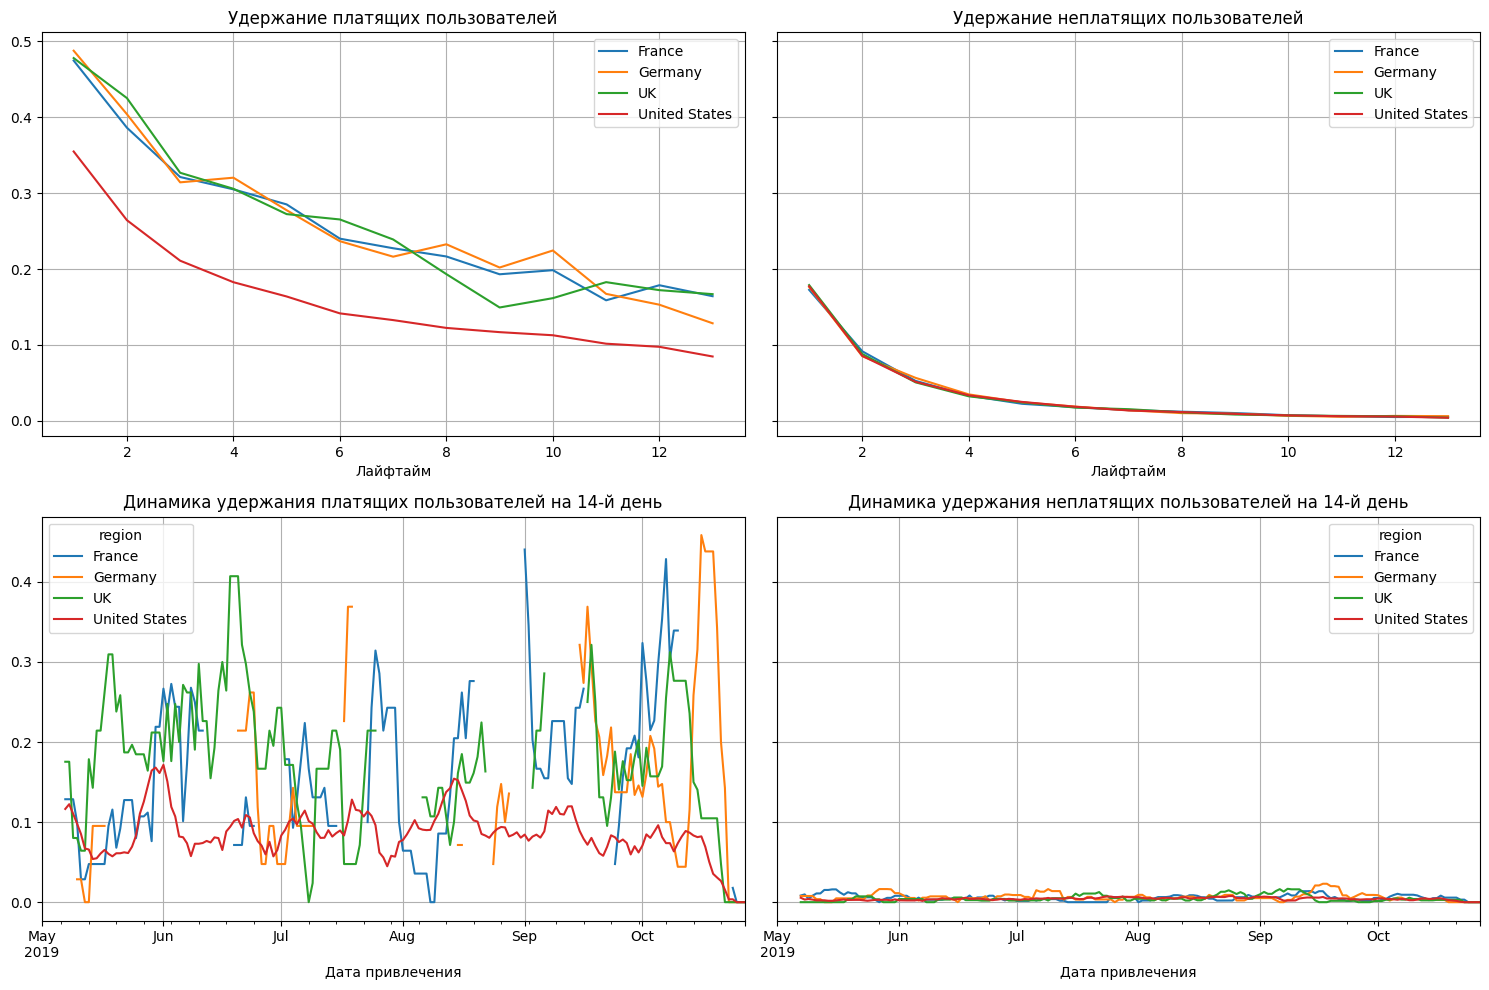

In [44]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для всех регионов характерно плохое удержание к 14 дню и резкий спад к концу периода. Особенно плохо себя проявляет удержание платящих пользователей в США.

#### 5.2.3 Разбивка по каналам

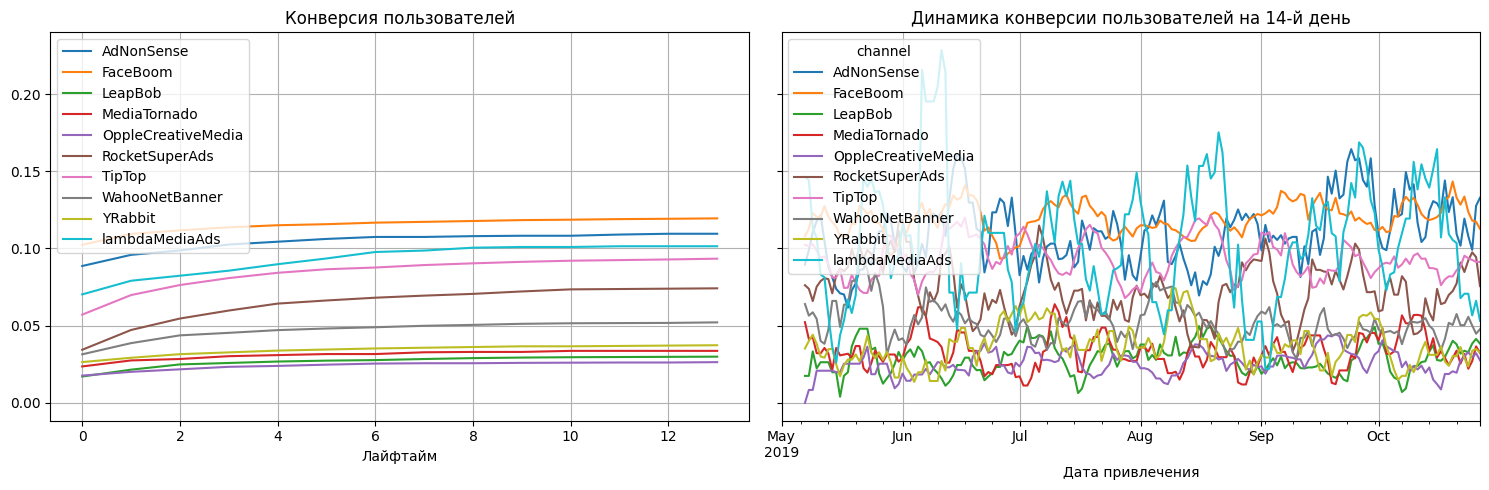

In [45]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Конверсия пользователей по каналам привлечения выглядит равномерной, максимальная конверсия у каналов: FaceBoom, AdNinSense, LambdaMedisAds и TipTop

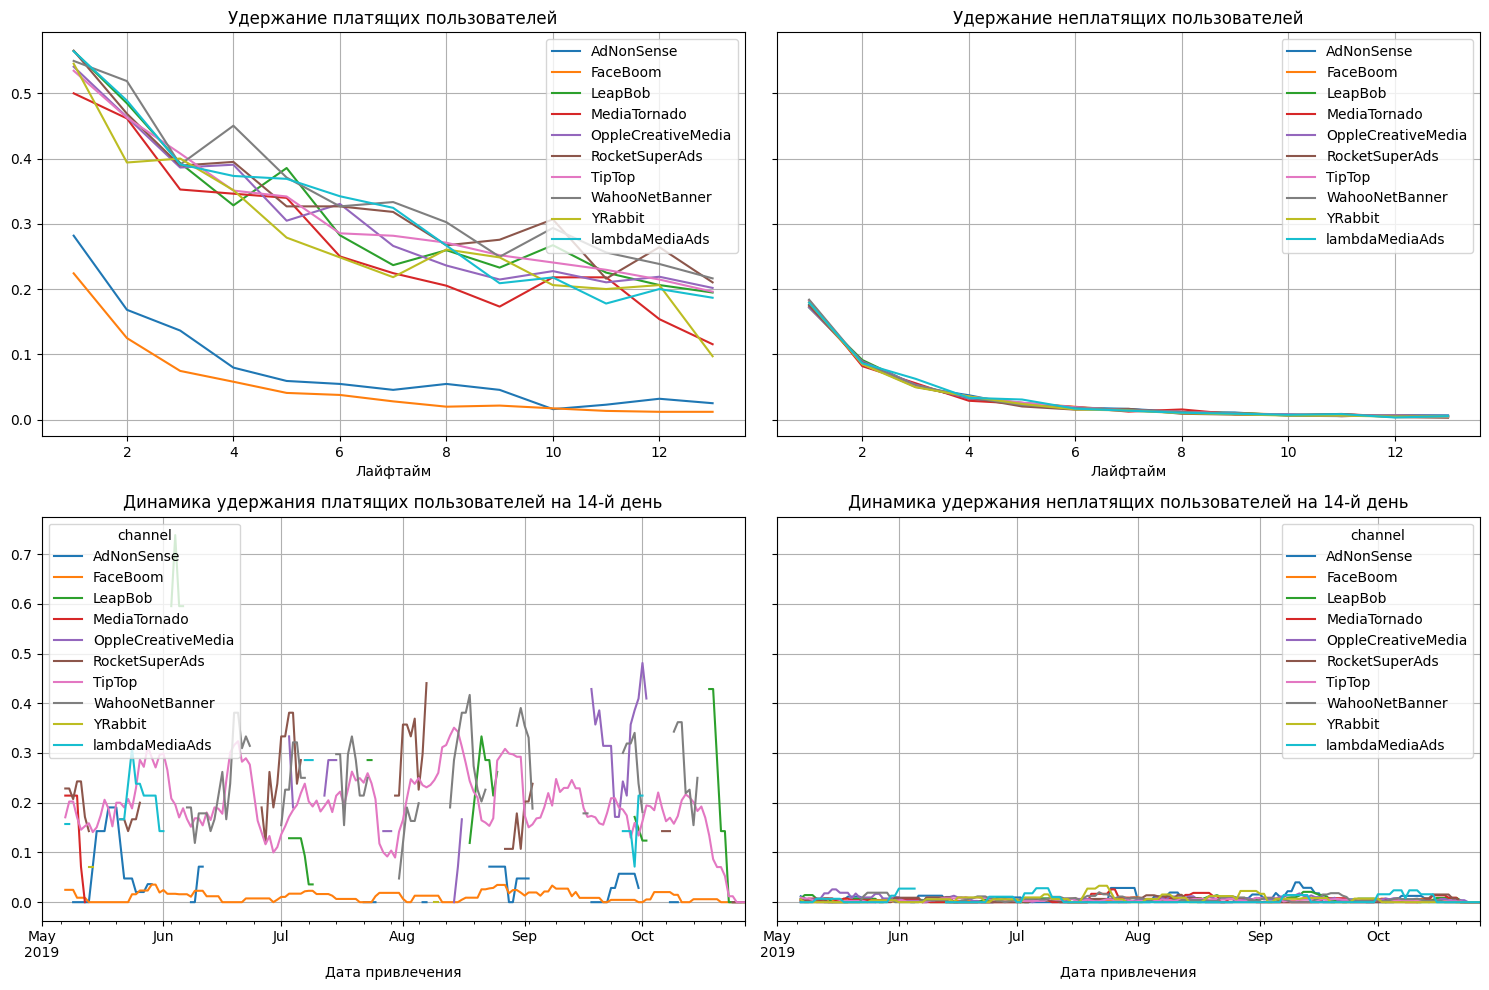

In [46]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для всех каналов привлечения картина выглядит примерно одинаково: стабильно плохое удержание к 14 дню и резкий спад к концу периода. Особенно плохо себя проявили в удержании платящих пользователей FaceBoom и AdNonSense

### 5.3 Окупаемость рекламы

#### 5.3.1 Разбивка по устройствам
Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

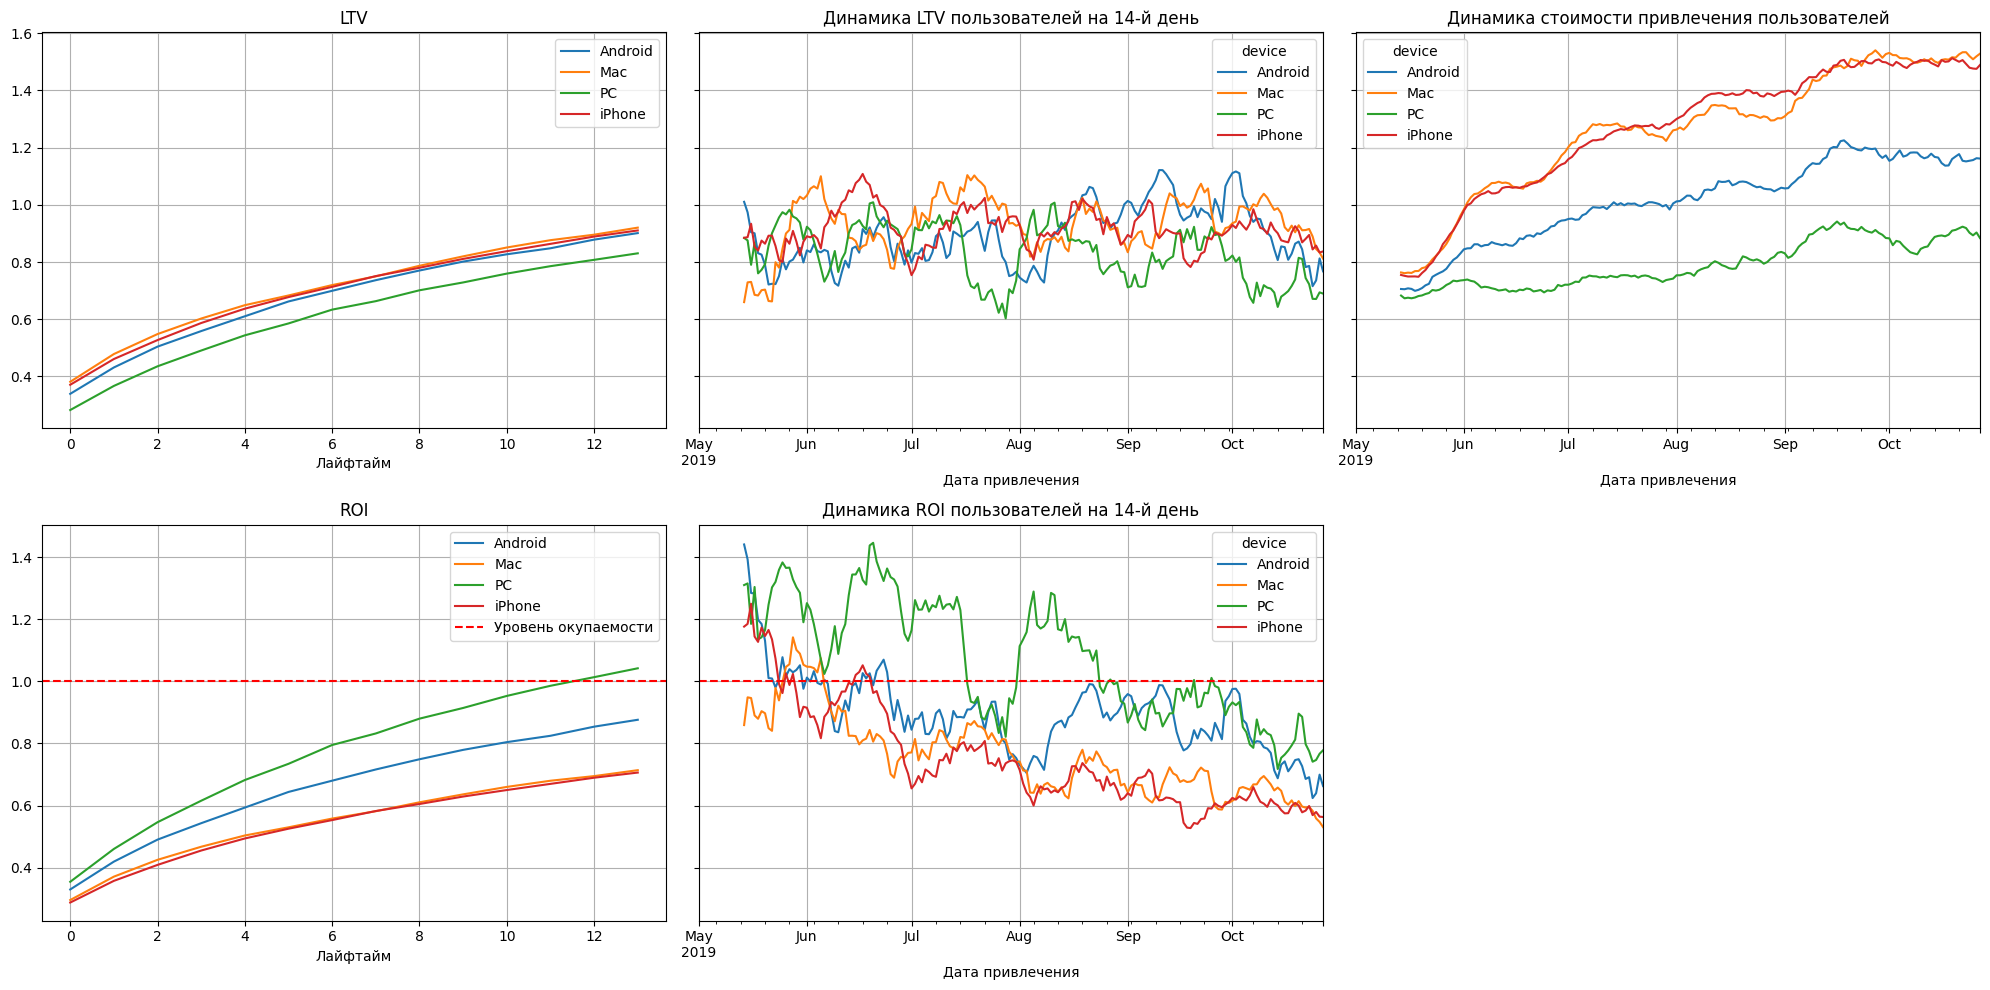

In [47]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Пользователи iPhone, Mac и Android не окупаются, а PC окупается на 11 день.
- Стоимость привлечения растет для всех устройств, особо выделяются iPhone и Mac.
- Окупаемость по всем устройствам подает на протяжении всего периода.

#### 5.3.2 Разбивка по странам
Проанализируйте окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

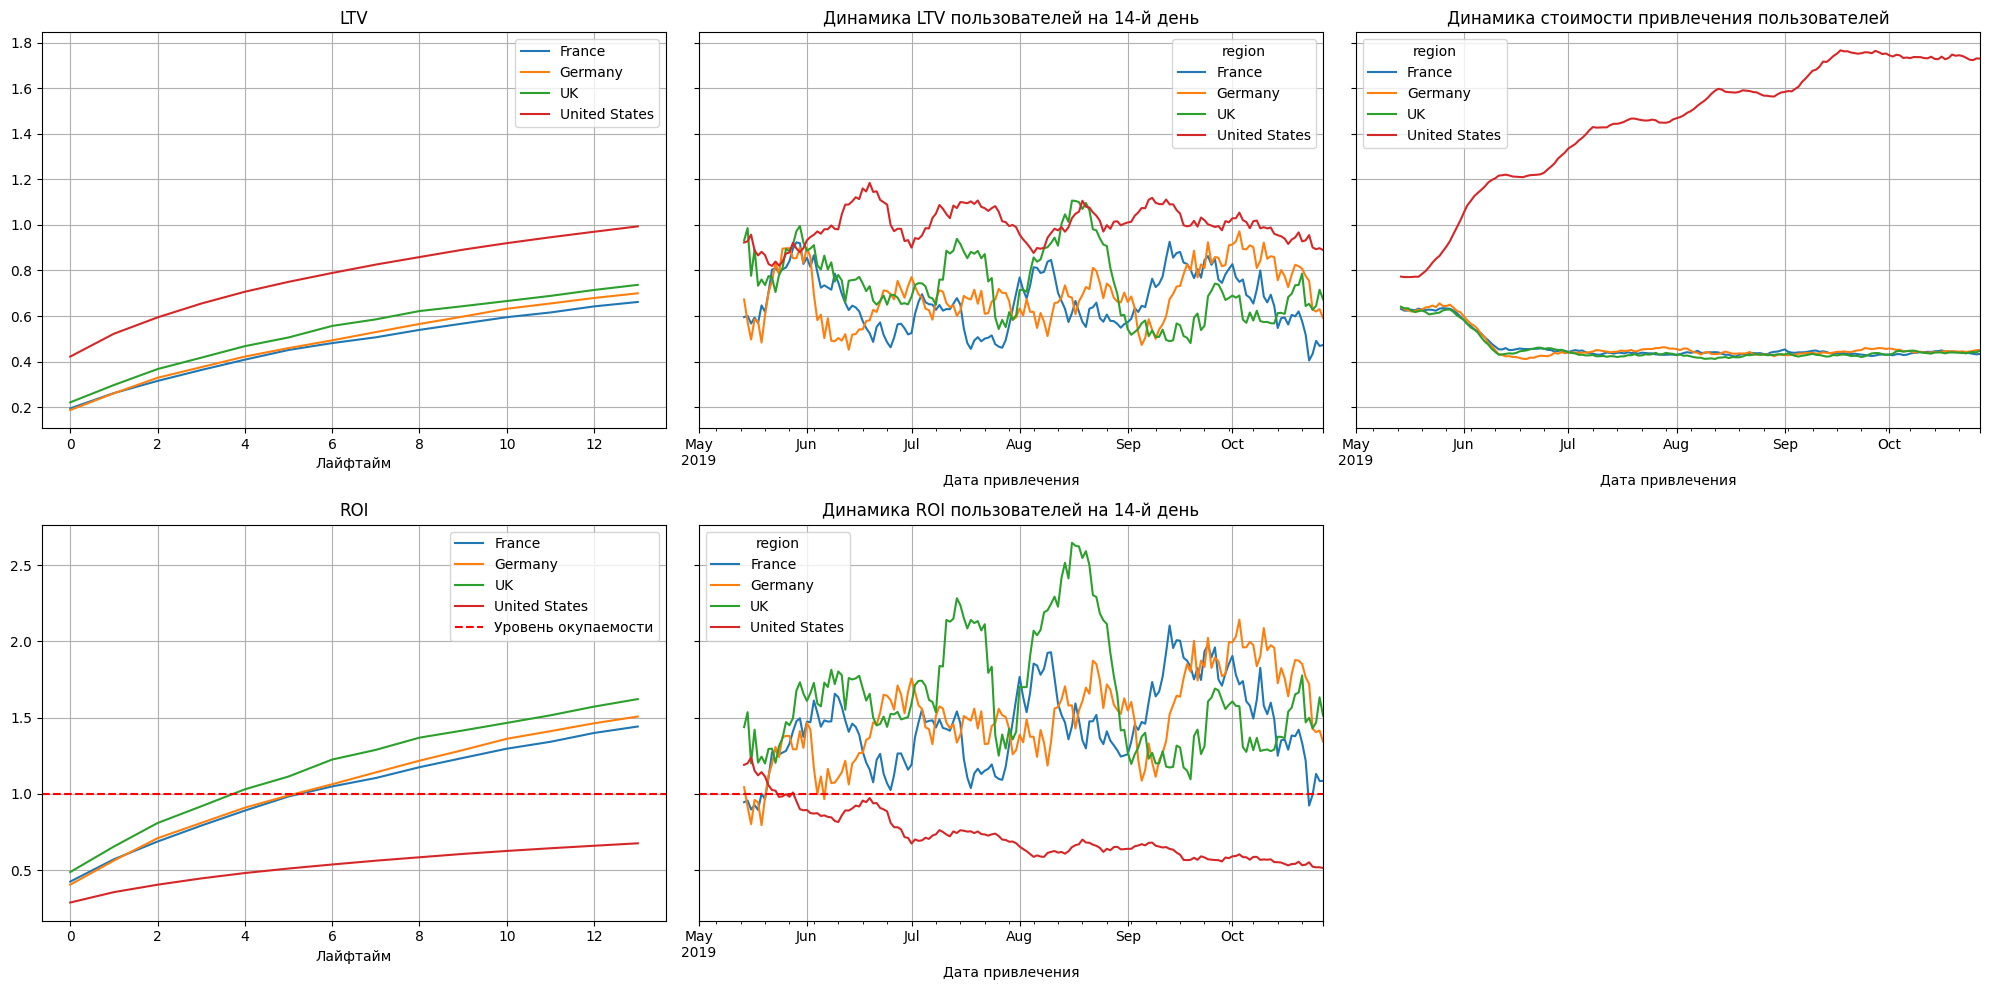

In [48]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- France, Germany, UK стабильно окупаются с 4-5 дня.
- Реклама в США не окупается и падает на протяжении всего периода.
- Стоимость привлечения пользователей в США значительно превышает другие страны и растет. В то время как стоимость привлечения пользователей в других регионах упала в середине июня и сохраняет стабильное положение. 
- LTV подвержен сезонности, но стабилен. 

#### 5.3.3 Разбивка по рекламным каналам
Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI

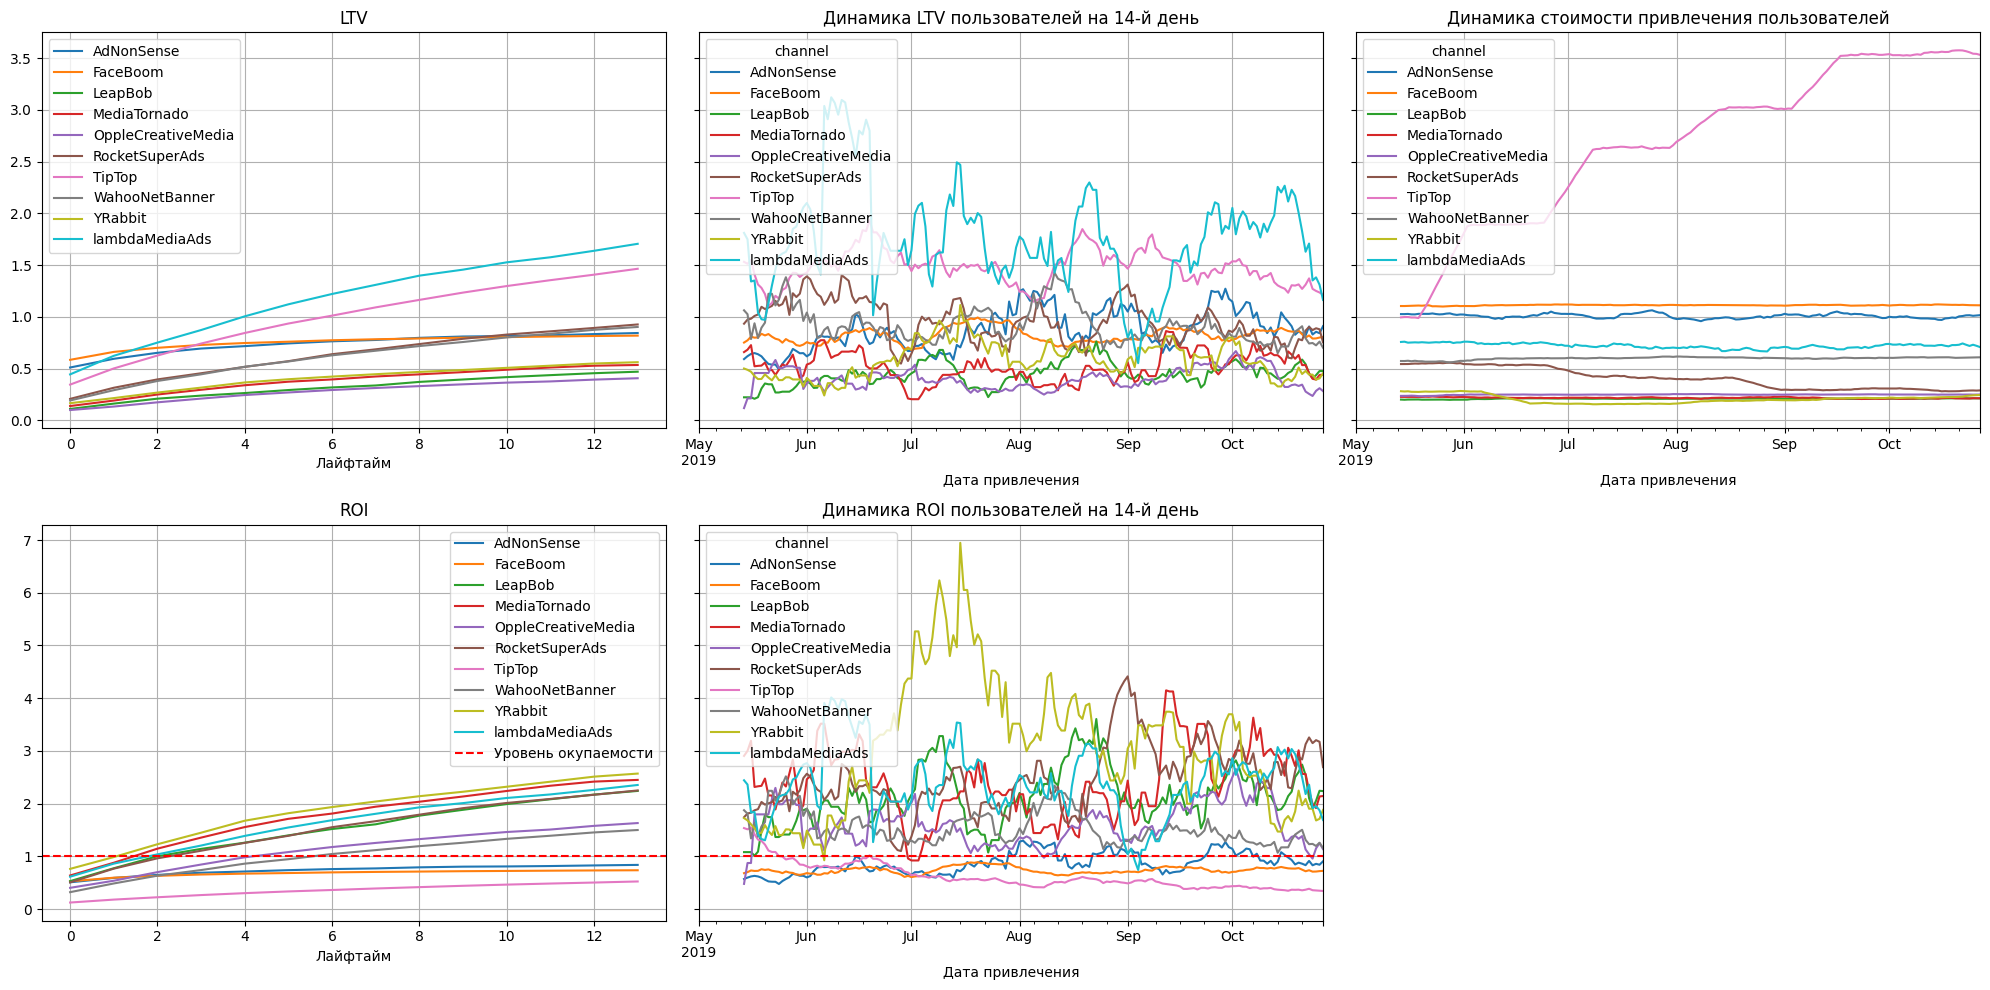

In [49]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Реклама по каналам TipTop, FaceBoom и adNonSense не окупается и являются убыточными, по остальным каналам идет стабильный рост и окупаются на 1-6 день. 
- Динамика стоимости привлечения показывает значительный рост стоимости привлечения на канале TipTop на протяжении всего периода.

### 5.4 Вывод  
- В целом реклама, направленная на привлечение пользователей не окупается и падает на протяжении всего периода;
- САС растет. Увеличивается расход рекламного бюджета;  
- Наибольшие проблемы с окупаемостью связаны с пользователями iPhone и Mac, в США и каналами привлечения: TipTop, FaceBoom и adNonSense.
- LTV подвержен сезонности, но стабилен.
- Проблемы окупаемости могут быть связаны с неправильным распределением рекламного бюджета. Возможно пользователи могли столкнуться с техническими ошибками, что привело к их уходу.
- Стоит пересмотреть распределение рекламного бюджета каналов TipTop, FaceBoom и adNonSense в сторону более перспективных. 

## 6. Вывод

В работе изучены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период и рекламные расходы.  

Явные дубликаты и пропуски в данных отсутствуют, был исправлен несоответствующий тип данных для дат.

Составили профили пользователей:
- определили минимальную и максимальную даты привлечения пользователей.  
- Наибольшее привлечение пользователей из США, что практически в 6 раз превышает показатели других регионов, в платящих пользователей переходит 6,9%. По остальным регионам привлечение пользователей практически одинаковое, так же как и процент пользователей, переходящий в платящих и составляет около 4%.  
- Набольшее число пользователей являются владельцами iPhone, а наибольший процент платящих пользователей приходят с Mac.  
- Наибольшее количество пользователей приходят из organic (т.е. приходят самостоятельно), однако имеет самый маленький процент перехода в платящих пользователей.  
- Лидерами каналов по привлечению пользователей и переходу их в платящих является: FaceBoom и TipTop. Хорошо себя проявили AdNonSense, lambdaMediaAds, хотя количество пользователей небольшое, зато хорошие показатели перехода пользователей в платящие. Наихудшим образом себя проявили каналы привлечения: OppleCreativeMedia, LeapBob, MediaTornado и YRabbit.  

Рассмотрели затраты на маркетинг:  
- Общая сумма расходов на маркетинг составила: 105497.3
- Средняя стоимость привлечения одного пользователя составляет 1.1
- Наибольшие вложения приходятся на рекламные источники TipTop и FaceBoom и составляют 83% от общих затрат.  
- За весь период больше всего выросли затраты на канал TipTop и поддерживаюся высокие затраты на канал FaceBoom. По остальным каналам практически одинаковые и стабильные затраты.  
- Стоимость привлечения пользователей по каналу TipTop ежемесячно растет и на конец периода составляет 3.5, а средняя стоимость составляет 2.8, что значительно привышает САС других каналов. Минимальная стоимость привлечения клиента составила 0.2 у каналов YRabbit, LeapBob и LeapBob.  

Изучили конверсию и удержание пользователей:  
- Пользователи iPhone и Mac хорошо конвертируются, что нельзя сказать про PC.
- Конверсия пользователей США значительно выше, чем в других регионах, но имеет самое низкое удержание пользователей.
- Для всех устройств, регионов и каналов картина выглядит примерно одинаково: стабильно плохое удержание к 14 дню и резкий спад к концу периода. Особенно плохо себя проявили в удержании платящих пользователей каналы FaceBoom и AdNonSense.  

Провели Оценку окупаемости рекламы:  
- В целом реклама, направленная на привлечение пользователей не окупается и падает на протяжении всего периода;
- САС растет. Увеличивается расход рекламного бюджета.  
- Наибольшие проблемы с окупаемостью связаны с пользователями iPhone и Mac, в США и каналами привлечения: TipTop, FaceBoom и adNonSense.  
- LTV подвержен сезонности, но стабилен.  

Рекомендации для отдела маркетинга:

- Стоит пересмотреть распределение рекламного бюджета каналов TipTop, FaceBoom в сторону более перспективных  (например  lambdaMediaAds и RocketSuperAds).  
- Рассмотреть увеличение рекламных компаний в Germany, UK и France для привлечения новых пользователей.   
- Выяснить причину падения ROI в США.   
- Выяснить причину низкого удержания платящих пользователей каналов FaceBoom и AdNonSense.  
- Рассмотреть наличие технических ошибок, что могло привести к уходу пользователей.

